In [65]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

**O algoritmo Apriori em Python**

Existem várias possibilidades de fazer Apriori em Python. Para esta apresentação, usamos o pacote eficiente-apriori.

Outra boa implementação pode ser encontrada é a do package mlxtend.

**Preparando os dados para o package efficient-apriori**

O efficient-apriori não permite usar data frames. Então, foi necessário usar uma lista de transações. Nessa lista, cada transação é representada como uma tupla dos produtos dessa transação.

Vamos inserir os dados do nosso exemplo anterior como uma lista de transações. Você pode fazer essa lista da seguinte forma:

In [66]:
data = pd.read_csv('/content/drive/MyDrive/compras_mercado.csv')
data

,leite,cafe,cerveja,pao,manteiga,arroz,feijao
0,0,1,0,1,1,0,0
1,1,0,1,1,1,0,0
2,0,1,0,1,1,0,0
3,1,1,0,1,1,0,0
4,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,0,1,1
9,0,0,0,0,0,1,0


**Configurar os parâmetros para o algoritmo e executar o algoritmo**

Como próximo passo, aplicaremos o algoritmo a priori a esses dados. Existem duas configurações que precisamos controlar:

**min_support:** é o limite de suporte que foi explicado na seção de algoritmo acima. 

**min_trust:** é apenas um filtro que filtra as regras que não atendem ao mínimo de confiança. 

ps: pode colocar em zero se quiser ver todas as regras geradas.

In [67]:
data.shape


(10, 7)

In [68]:
data.sum()

leite       2
cafe        3
cerveja     2
pao         5
manteiga    5
arroz       2
feijao      2
dtype: int64

In [69]:
frq_items = apriori(data, min_support = 0.1, use_colnames = True)
  

**As saídas do algoritmo são os conjuntos de itens e as regras que foram geradas.**

In [77]:
print(frq_items)

   support               itemsets
0      0.3                 (cafe)
1      0.5                  (pao)
2      0.5             (manteiga)
3      0.3            (cafe, pao)
4      0.3       (cafe, manteiga)
5      0.4        (manteiga, pao)
6      0.3  (cafe, manteiga, pao)


In [70]:
data.columns

Index(['leite', 'cafe', 'cerveja', 'pao', 'manteiga', 'arroz', 'feijao'], dtype='object')

O algoritmo Apriori pode ser considerado o algoritmo fundamental na basket analysis ou analise de cesta de compras, que se resume a um estudo das cestas de clientes de um mercado, por exemplo.





O objetivo é encontrar combinações de produtos que costumam ser comprados juntos, que chamamos de conjuntos de itens frequentes. O termo técnico para o domínio é Mineração frequente de conjuntos de itens.

A basket analysis não é o único tipo de análise quando usamos conjuntos de itens frequentes ou o algoritmo Apriori. Ela pode ser usada para qualquer tópico no qual você queira estudar conjuntos de itens frequentes.

**Como organizar seus dados para o algoritmo Apriori?**

Tendo um conjunto de dados no qual os clientes estão comprando vários produtos. Seu objetivo é descobrir quais combinações de produtos são frequentemente compradas juntas.

Você precisa organizar os dados de forma que exista um conjunto de produtos em cada linha. Cada um desses conjuntos contém produtos que foram comprados na mesma transação.

A solução mais simples seria percorrer todas as transações e, dentro das transações, percorrer todas as combinações de produtos e contá-las, mas isso levaria muito tempo.

**Etapa 1. Calculando o suporte para cada item individual**

O algoritmo é baseado na noção de suporte. O suporte é simplesmente o número de transações em que um produto específico (ou combinação de produtos) ocorre.

O primeiro passo do algoritmo é calcular o suporte de cada item individual. Isso basicamente se resume a contar, para cada produto, em quantas transações ele ocorre.

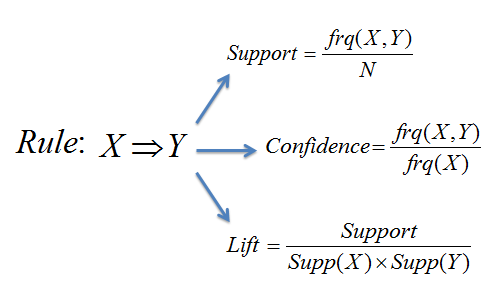

**Etapa 2. Decidir sobre o limite de suporte**

Agora que temos o suporte para cada um dos produtos individuais, usaremos isso para filtrar alguns dos produtos que não são frequentes. Para fazer isso, precisamos decidir sobre um limite de suporte. Para nosso exemplo atual, vamos usar 0,3
 como mínimo.

**Etapa 3. Selecionando os itens frequentes**

Podemos ver que existem dois produtos individuais que têm um suporte de 0.5 (o que significa que têm pelo menos 5 ocorrências). Esses produtos são Pão e Manteiga.

**Inspecionar as regras e suas métricas**

In [71]:
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules)

                 antecedents                 consequents  antecedent support  \
33            (cerveja, pao)                     (leite)                 0.1   
38       (cerveja, manteiga)                     (leite)                 0.1   
77  (cerveja, manteiga, pao)                     (leite)                 0.1   
80       (cerveja, manteiga)                (leite, pao)                 0.1   
82            (cerveja, pao)           (manteiga, leite)                 0.1   
..                       ...                         ...                 ...   
75                     (pao)     (cafe, manteiga, leite)                 0.5   
87                (manteiga)       (cerveja, leite, pao)                 0.5   
89                     (pao)  (cerveja, manteiga, leite)                 0.5   
13                     (pao)                   (cerveja)                 0.5   
15                (manteiga)                   (cerveja)                 0.5   

    consequent support  support  confid

**Etapa 4. Encontrando o suporte dos conjuntos de itens frequentes**

O próximo passo é fazer a mesma análise, mas agora usando pares de produtos em vez de produtos individuais. O número de combinações pode rapidamente se tornar grande aqui, especialmente se você tiver uma lista extensa de produtos.

A grande “invenção” por trás do algoritmo Apriori é que iremos ignorar diretamente todos os pares que contenham algum dos itens não frequentes. Graças a isso, temos muito menos pares de itens para escanear.

Aqui está uma lista de todos os pares que contêm manteiga, pão ou ambos. Tudo isso pode ser descartado e isso agilizará a execução de nossas contagens.

In [72]:
frq_items = apriori(data, min_support = 0.3, use_colnames = True)


In [73]:
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules)

         antecedents       consequents  antecedent support  \
9             (cafe)   (manteiga, pao)                 0.3   
0             (cafe)             (pao)                 0.3   
2             (cafe)        (manteiga)                 0.3   
6   (cafe, manteiga)             (pao)                 0.3   
7        (cafe, pao)        (manteiga)                 0.3   
4         (manteiga)             (pao)                 0.5   
5              (pao)        (manteiga)                 0.5   
8    (manteiga, pao)            (cafe)                 0.4   
1              (pao)            (cafe)                 0.5   
3         (manteiga)            (cafe)                 0.5   
10        (manteiga)       (cafe, pao)                 0.5   
11             (pao)  (cafe, manteiga)                 0.5   

    consequent support  support  confidence  lift  leverage  conviction  
9                  0.4      0.3        1.00   2.5      0.18         inf  
0                  0.5      0.3        1.00  

**Etapa 5. Repita para conjuntos maiores**


**Etapa 6. Gerar regras de associação e calcular a confiança**

Agora que temos os maiores conjuntos de itens frequentes, a próxima etapa é convertê-los em Regras de Associação. As Regras de Associação vão um passo além de apenas listar produtos que ocorrem juntos com frequência.

As Regras de Associação são escritas no formato: Produto X => Produto Y. Isso significa que você obtém uma regra que informa que, se você comprar o produto X, provavelmente também comprará o produto Y.

Existe uma medida adicional chamada confiança. A confiança informa uma porcentagem de casos em que essa regra é válida. 100% de confiança significa que essa associação sempre ocorre; 50%, por exemplo, significa que a regra é válida apenas 50% do tempo.
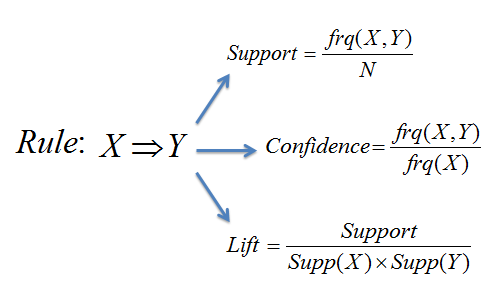

In [74]:
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules)

         antecedents       consequents  antecedent support  \
9             (cafe)   (manteiga, pao)                 0.3   
0             (cafe)             (pao)                 0.3   
2             (cafe)        (manteiga)                 0.3   
6   (cafe, manteiga)             (pao)                 0.3   
7        (cafe, pao)        (manteiga)                 0.3   
4         (manteiga)             (pao)                 0.5   
5              (pao)        (manteiga)                 0.5   
8    (manteiga, pao)            (cafe)                 0.4   
1              (pao)            (cafe)                 0.5   
3         (manteiga)            (cafe)                 0.5   
10        (manteiga)       (cafe, pao)                 0.5   
11             (pao)  (cafe, manteiga)                 0.5   

    consequent support  support  confidence  lift  leverage  conviction  
9                  0.4      0.3        1.00   2.5      0.18         inf  
0                  0.5      0.3        1.00  

In [75]:
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules)

         antecedents       consequents  antecedent support  \
9             (cafe)   (manteiga, pao)                 0.3   
0             (cafe)             (pao)                 0.3   
2             (cafe)        (manteiga)                 0.3   
6   (cafe, manteiga)             (pao)                 0.3   
7        (cafe, pao)        (manteiga)                 0.3   
4         (manteiga)             (pao)                 0.5   
5              (pao)        (manteiga)                 0.5   
8    (manteiga, pao)            (cafe)                 0.4   
1              (pao)            (cafe)                 0.5   
3         (manteiga)            (cafe)                 0.5   
10        (manteiga)       (cafe, pao)                 0.5   
11             (pao)  (cafe, manteiga)                 0.5   

    consequent support  support  confidence  lift  leverage  conviction  
9                  0.4      0.3        1.00   2.5      0.18         inf  
0                  0.5      0.3        1.00  

Etapa 7. Calcular o aumento

Depois de obter as regras, o último passo é calcular o levantamento de cada regra. De acordo com a definição, o levantamento de uma regra é uma métrica de desempenho que indica a força da associação entre os produtos da regra.

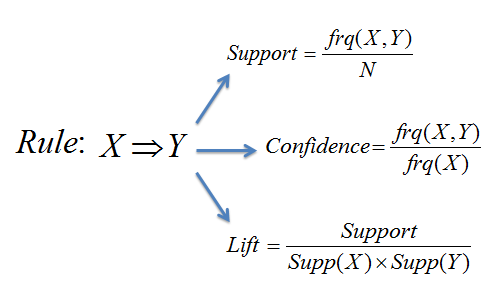

Isso significa que o aumento basicamente compara a melhoria de uma regra de associação com o conjunto de dados geral. Se “qualquer produto => X” em 10% dos casos enquanto “A => X” em 75% dos casos, a melhora seria de 75% / 10% = 7,5.

Se o lift de uma regra for 1, então os produtos são independentes um do outro. Qualquer regra que tenha um aumento de 1 pode ser descartada.

Se o aumento de uma regra for maior que 1, o valor do aumento informa o quanto o produto do lado direito depende do lado esquerdo.

**Precisão a priori: como equilibrar suporte, confiança e levantamento de uma regra?**

Isso basicamente nos dá três métricas para interpretar:

- suporte (o número de vezes, ou porcentagem, que os produtos ocorrem simultaneamente)

- confiança (o número de vezes que uma regra ocorre, também a probabilidade condicional do lado direito dado o lado esquerdo)

- lift (a força da associação)

Essas três métricas têm sua própria validade. Portanto, é difícil escolher entre eles. Por exemplo, se você tiver uma regra que tenha um aumento maior, mas menor confiança do que outra regra, seria difícil afirmar que uma regra é "melhor que outra". Neste ponto, você pode querer apenas manter as duas regras ou tentar encontrar um motivo para preferir uma métrica à outra em seu caso de uso específico.